# Rede Neural Convolucional
## Reconhecimento de pedra, papel e tesoura

## Carregamento do dataset

Referência: https://laurencemoroney.com/datasets.html

In [2]:
import os

In [8]:
# TRAIN DATASETS

rock_dir = "../datasets/rock_paper_scissors/rps/rock"
paper_dir = "../datasets/rock_paper_scissors/rps/paper"
scissors_dir = "../datasets/rock_paper_scissors/rps/scissors"

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [11]:
rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

### Print de algumas imagens do dataset de treino

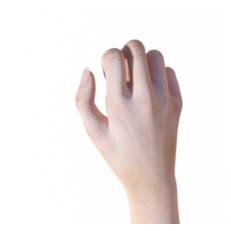

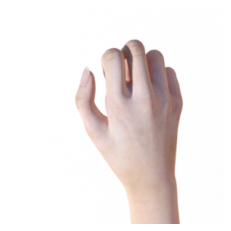

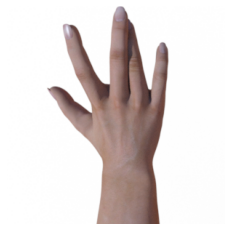

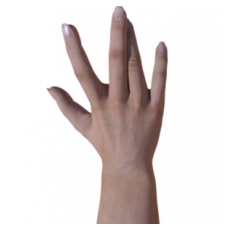

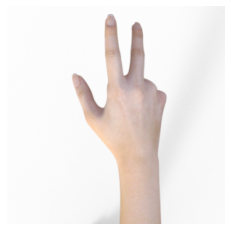

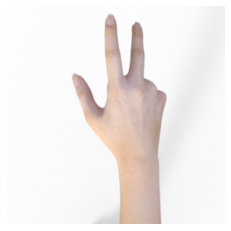

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

## Pré-processamento

In [16]:
import tensorflow as tf
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [17]:
TRAINING_DIR = "../datasets/rock_paper_scissors/rps"

training_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

VALIDATION_DIR = "../datasets/rock_paper_scissors/rps-test-set"

validation_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                      target_size=(150,150),
                                                      class_mode='categorical',
                                                      batch_size=126)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(150,150),
                                                             class_mode='categorical',
                                                             batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [46]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

## Rede Neural

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)), # primeira camada de convolução
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # segunda camada de convolução
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # terceira camada de convolução
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # quarta camada de convolução
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_generator,
                   epochs=25,
                   steps_per_epoch=20,
                   validation_data=validation_generator,
                   verbose=1,
                   validation_steps=3)

model.save("rps")

Epoch 1/25
20/20 [==============================] - 111s 5s/step - loss: 1.1508 - accuracy: 0.3456 - val_loss: 1.1007 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 86s 4s/step - loss: 1.0922 - accuracy: 0.3849 - val_loss: 1.2398 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 94s 5s/step - loss: 1.0452 - accuracy: 0.4690 - val_loss: 0.7221 - val_accuracy: 0.6720
Epoch 4/25
20/20 [==============================] - 90s 4s/step - loss: 0.9669 - accuracy: 0.5567 - val_loss: 0.4950 - val_accuracy: 0.9892
Epoch 5/25
20/20 [==============================] - 91s 5s/step - loss: 0.8628 - accuracy: 0.6536 - val_loss: 0.3669 - val_accuracy: 0.9785
Epoch 6/25
20/20 [==============================] - 89s 4s/step - loss: 0.5897 - accuracy: 0.7361 - val_loss: 0.3880 - val_accuracy: 0.9355
Epoch 7/25
20/20 [==============================] - 91s 4s/step - loss: 0.5099 - accuracy: 0.7948 - val_loss: 0.2913 - val_accuracy: 0.9113
Epoch 8/25
20/20 [=

INFO:tensorflow:Assets written to: rps\assets


INFO:tensorflow:Assets written to: rps\assets


## Avaliação

In [24]:
import matplotlib.pyplot as plt

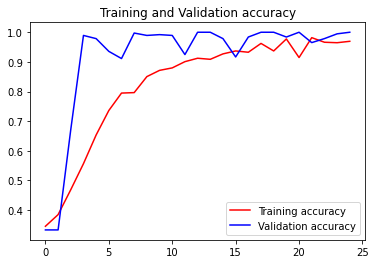

<Figure size 432x288 with 0 Axes>

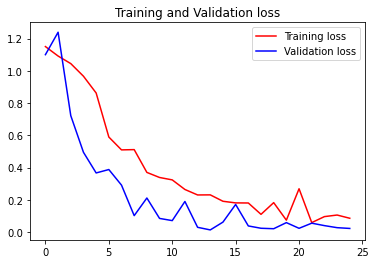

<Figure size 432x288 with 0 Axes>

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [60]:
model.evaluate(validation_generator)

3/3 [==============================] - 2s 675ms/step - loss: 0.0226 - accuracy: 1.0000


[0.022616108879446983, 1.0]

## Predição de imagens

In [41]:
import numpy as np
from keras.utils import load_img, img_to_array

1/1 [==============================] - 0s 26ms/step


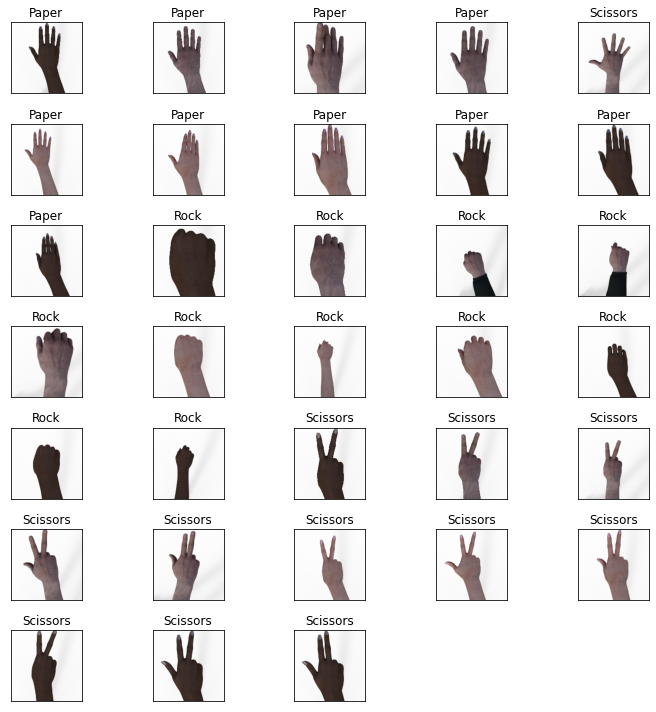

In [59]:
PREDICTION_DIR = "../datasets/rock_paper_scissors/rps-validation"

prediction_files = os.listdir(PREDICTION_DIR)

paths = [os.path.join(PREDICTION_DIR, prediction_files[i]) for i in range(len(prediction_files))]

fig = plt.figure(figsize=(10,10))

for num,path in enumerate(paths):
    
    img = load_img(path, target_size=(150,150))
    
    y = fig.add_subplot(7, 5, num+1)
    
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    
    classes = model.predict(images)
    
    if np.argmax(classes)==0:
        str_label='Paper'
    elif np.argmax(classes)==1:
        str_label='Rock'
    else:
        str_label='Scissors'
        
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()